In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

<div style="border-radius:10px; padding: 15px; background-color: #90EE90; font-size:110%; text-align:left;color:black">
    
1. By yourself, Take a color photo of an object and then place that object in another
environment. Then resize and turn it around and retake a picture of it.
Now extract and match the keypoints of these two photos twice. Once when the image is in
color and once when the image is Gray level. Which one works better? Why?

In [2]:
def show_multi_img (rows,columns,img_names,titles = None,vmin = 0,vmax = 255):
    fig = plt.figure(figsize=(15,17),dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows,columns,i+1)
        plt.imshow(img_names[i],cmap='gray',vmin=vmin,vmax=vmax)
        plt.axis('off')
        if titles is not None:
            plt.title(str(i+1) + '. ' + titles[i])
    plt.show()

In [3]:
def show_img_plt(img, c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

In [4]:
def resize_img(img,scale_precent):
    width = int(img.shape[1]*scale_precent/100)
    hight = int(img.shape[0]*scale_precent/100)
    dim = (width,hight)

    resized = cv2.resize(img,dim)
    return resized

In [5]:
#Read Image
img1 = cv2.imread(r'E:\TA Filoger\Exercise\DIP\DIP21\ex21\picture1.JPG')
img2 = cv2.imread(r'E:\TA Filoger\Exercise\DIP\DIP21\ex21\picture2.JPG')

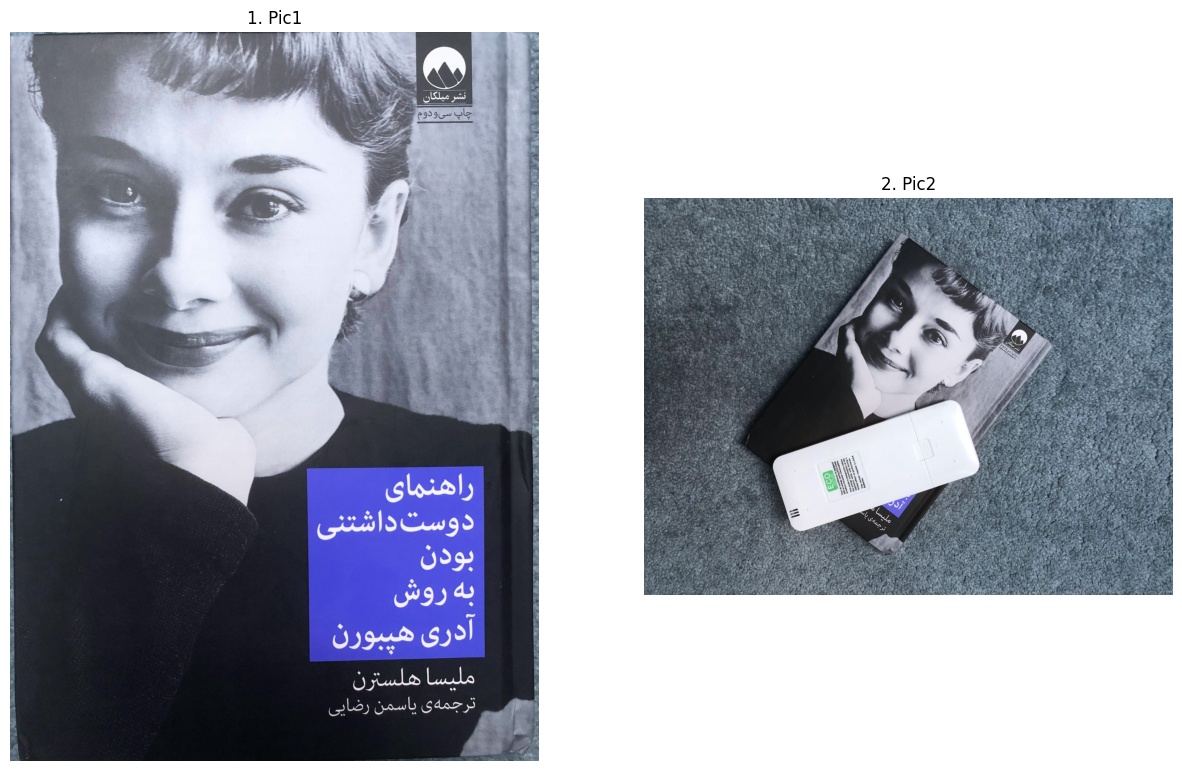

In [6]:
show_multi_img(1,2,(img1,img2),titles=['Pic1','Pic2'])

In [7]:
#color Conversion
img1_rgb = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

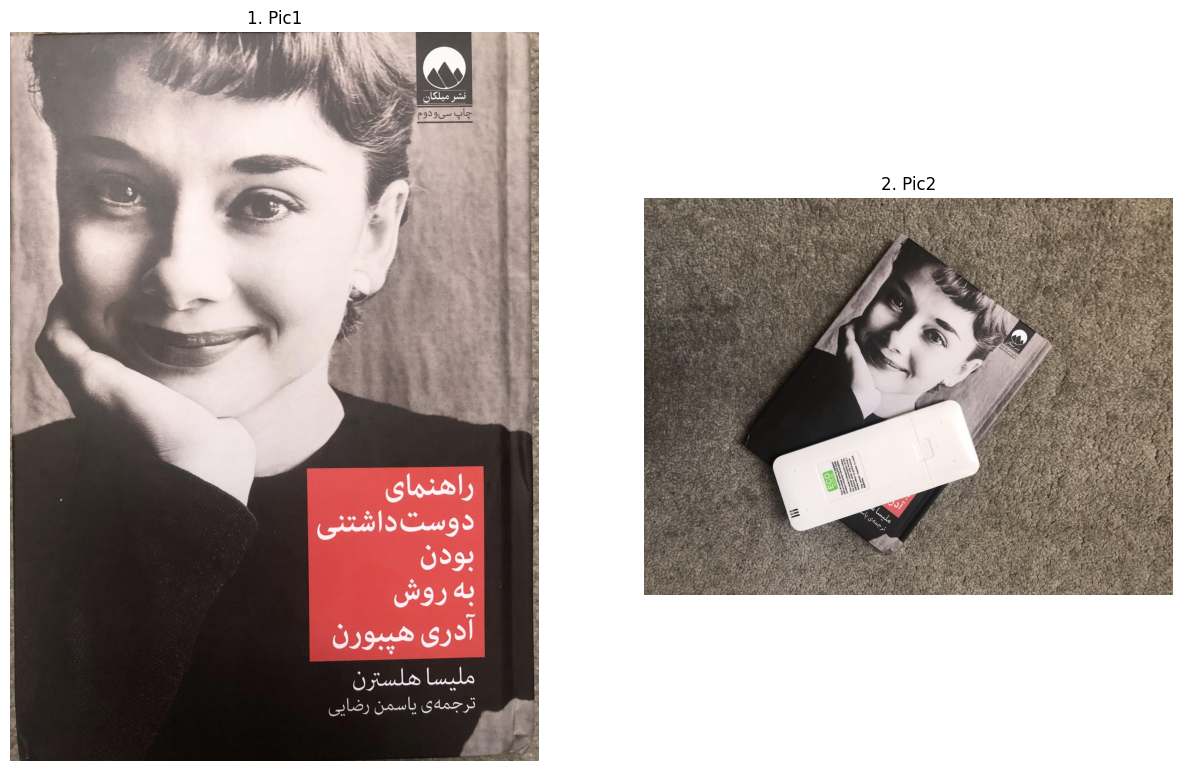

In [8]:
show_multi_img(1,2,(img1_rgb,img2_rgb),titles=['Pic1','Pic2'])

In [9]:
img1_resized = resize_img(img1_rgb,60)
img2_resized = resize_img(img2_rgb,60)

### SIFT

In [10]:
sift = cv2.SIFT_create()

# x,y -->keypoints  Discriptor -->Histogram

keypoints_1,descriptors_1 = sift.detectAndCompute(img1_resized,mask=None)
keypoints_2,descriptors_2 = sift.detectAndCompute(img2_resized,mask=None)

img1_dkp = cv2.drawKeypoints(img1_resized,keypoints_1,0,flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_dkp = cv2.drawKeypoints(img2_resized,keypoints_2,0,flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [11]:
bf = cv2.BFMatcher(cv2.NORM_L2,crossCheck =True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches,key=lambda x:x.distance)

In [12]:
result = cv2.drawMatches(img1_resized,keypoints_1,img2_resized,keypoints_2,matches[:50],None)

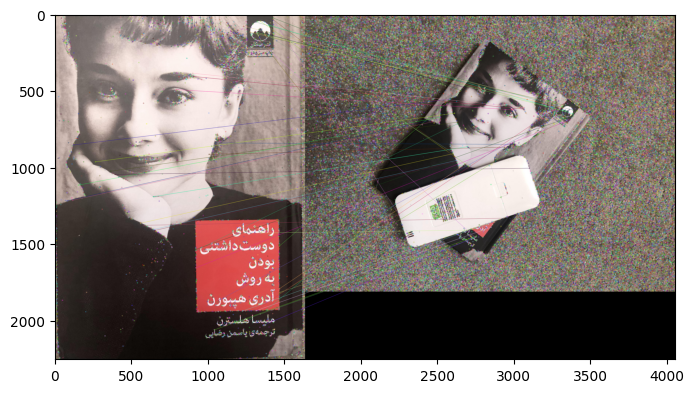

In [13]:
show_img_plt(result)

In [14]:
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [15]:
img1_resized_gray = resize_img(img1_gray,60)
img2_resized_gray = resize_img(img2_gray,60)

In [16]:
sift = cv2.SIFT_create()

# x,y -->keypoints  Discriptor -->Histogram
            
keypoints_1,descriptors_1 = sift.detectAndCompute(img1_resized_gray,mask=None)
keypoints_2,descriptors_2 = sift.detectAndCompute(img2_resized_gray,mask=None)

img1_dkp_gray = cv2.drawKeypoints(img1_resized_gray,keypoints_1,0,flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_dkp_gray = cv2.drawKeypoints(img2_resized_gray,keypoints_2,0,flags =cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Document url
[OpenCV](https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html)

In [17]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [18]:

matches = flann.knnMatch(descriptors_1,descriptors_2,k=2)

In [19]:
good = [] 
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)


In [20]:
good

[< cv2.DMatch 0000018A88FFC7B0>,
 < cv2.DMatch 0000018A88FFBF90>,
 < cv2.DMatch 0000018A88FFBBB0>,
 < cv2.DMatch 0000018A88FFB750>,
 < cv2.DMatch 0000018A88FFBC30>,
 < cv2.DMatch 0000018A88FFB910>,
 < cv2.DMatch 0000018A88FFB150>,
 < cv2.DMatch 0000018A88FFB3B0>,
 < cv2.DMatch 0000018A88FFBE50>,
 < cv2.DMatch 0000018A88FFB130>,
 < cv2.DMatch 0000018A88FFBDB0>,
 < cv2.DMatch 0000018A88FFBD10>,
 < cv2.DMatch 0000018A88FFB450>,
 < cv2.DMatch 0000018A88FFBF50>,
 < cv2.DMatch 0000018A88FFB610>,
 < cv2.DMatch 0000018A88FFBB90>,
 < cv2.DMatch 0000018A88FFB0D0>,
 < cv2.DMatch 0000018A88FFB330>,
 < cv2.DMatch 0000018A88FF82B0>,
 < cv2.DMatch 0000018A88FF8A30>,
 < cv2.DMatch 0000018A88FF8470>,
 < cv2.DMatch 0000018A88FF8B10>,
 < cv2.DMatch 0000018A88FF88F0>,
 < cv2.DMatch 0000018A88FF8850>,
 < cv2.DMatch 0000018A88FF8350>,
 < cv2.DMatch 0000018A88FF8F50>,
 < cv2.DMatch 0000018A88FF8F70>,
 < cv2.DMatch 0000018A88FF80D0>,
 < cv2.DMatch 0000018A88FF8C50>,
 < cv2.DMatch 0000018A88FF8CD0>,
 < cv2.DMa

In [21]:
MIN_MATCH_COUNT = 10
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ keypoints_1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ keypoints_2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1_gray.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

In [22]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1_gray,keypoints_1,img2,keypoints_2,good,None,**draw_params)

In [24]:

bf = cv2.BFMatcher(cv2.NORM_L2,crossCheck =True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches,key=lambda x:x.distance)

In [25]:
result_gray = cv2.drawMatches(img1_resized_gray,keypoints_1,img2_resized_gray,keypoints_2,matches[:50],None)

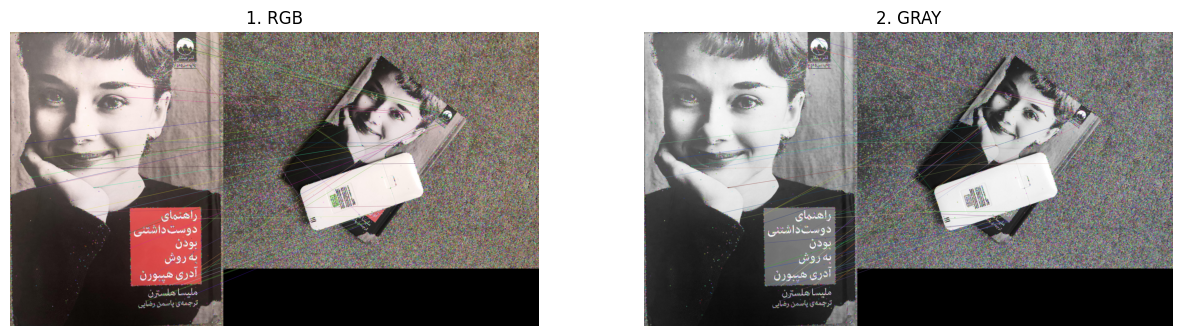

In [26]:
show_multi_img(1,2,(result,result_gray),titles=['RGB','GRAY'])